In [35]:
import pandas as pd
from ydata_profiling import ProfileReport

# Data set exploration with profile report

In [36]:
loan = pd.read_csv('loan_data.csv')
profile = ProfileReport(loan, title="Profiling Report")

In [8]:
profile.to_file("loan_profile.html")
load.head(10)

Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 302.29it/s]


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


# Data set transformation: handle different types of data

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [83]:
cat_col = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
num_col = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat_col)], remainder='passthrough', verbose_feature_names_out=False)

In [84]:
X = transformer.fit_transform(loan[cat_col+num_col])
y = loan[['loan_status']]

In [85]:
X = pd.DataFrame(X, columns=transformer.get_feature_names_out())
pd.set_option('display.max_columns', None)
X.head(10)

,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,22.0,71948.0,0.0,35000.0,16.02,0.49,3.0,561.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,12282.0,0.0,1000.0,11.14,0.08,2.0,504.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,25.0,12438.0,3.0,5500.0,12.87,0.44,3.0,635.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,23.0,79753.0,0.0,35000.0,15.23,0.44,2.0,675.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24.0,66135.0,1.0,35000.0,14.27,0.53,4.0,586.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,12951.0,0.0,2500.0,7.14,0.19,2.0,532.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,93471.0,1.0,35000.0,12.42,0.37,3.0,701.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24.0,95550.0,5.0,35000.0,11.11,0.37,4.0,585.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,24.0,100684.0,3.0,35000.0,8.90,0.35,2.0,544.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,12739.0,0.0,1600.0,14.74,0.13,3.0,640.0


# Train a classification model: LightGBM

In [86]:
import sys
!{sys.executable} -m pip install lightgbm optuna
import lightgbm as lgb
import optuna


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    num_leaves = trial.suggest_int("num_leaves", 2, 256)
    max_depth = trial.suggest_int("max_depth", -1, 50)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    feature_fraction = trial.suggest_float("feature_fraction", 0.5, 1.0)
    bagging_fraction = trial.suggest_float("bagging_fraction", 0.5, 1.0)
    bagging_freq = trial.suggest_int("bagging_freq", 1, 10)

    model = lgb.LGBMClassifier(
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        max_depth=max_depth,
        min_child_samples=min_child_samples,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        n_estimators=n_estimators,
        random_state=42
    )
    model.fit(Xtrain, ytrain)
    predictions = model.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    return accuracy


In [90]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2024-12-12 13:47:29,133] A new study created in memory with name: no-name-a6f136c7-663b-46f5-9094-90a733db03b1
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-12-12 13:47:47,270] Trial 0 finished with value: 0.9361111111111111 and parameters: {'n_estimators': 966, 'learning_rate': 0.09280871591629902, 'num_leaves': 205, 'max_depth': 16, 'subsample': 0.9238658933820127, 'min_child_samples': 61, 'colsample_bytree': 0.9265721145229662, 'feature_fraction': 0.6972434677908899, 'bagging_fraction': 0.5541219855399164, 'bagging_freq': 6}. Best is trial 0 with value: 0.9361111111111111.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

[I 2024-12-12 13:47:51,377] Trial 1 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 599, 'learning_rate': 0.04539186458756267, 'num_leaves': 96, 'max_depth': 8, 'subsample': 0.673284603599561, 'min_child_samples': 52, 'colsample_bytree': 0.6240069107601801, 'feature_fraction': 0.9943688380644501, 'bagging_fraction': 0.7563776223955643, 'bagging_freq': 4}. Best is trial 1 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 secon

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-12 13:48:02,286] Trial 2 finished with value: 0.9358888888888889 and parameters: {'n_estimators': 950, 'learning_rate': 0.035941847983193914, 'num_leaves': 107, 'max_depth': 25, 'subsample': 0.9522580944295524, 'min_child_samples': 86, 'colsample_bytree': 0.9437553317825829, 'feature_fraction': 0.502110128408322, 'bagging_fraction': 0.5669711404323095, 'bagging_freq': 7}. Best is trial 1 with value: 0.9366666666666666.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


[I 2024-12-12 13:48:08,334] Trial 3 finished with value: 0.9388888888888889 and parameters: {'n_estimators': 688, 'learning_rate': 0.03714795707443604, 'num_leaves': 74, 'max_depth': 20, 'subsample': 0.8743537834686167, 'min_child_samples': 20, 'colsample_bytree': 0.5298072938609741, 'feature_fraction': 0.8224520214975917, 'bagging_fraction': 0.7448458416860463, 'bagging_freq': 3}. Best is trial 3 with value: 0.9388888888888889.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-12 13:48:26,676] Trial 4 finished with value: 0.9372222222222222 and parameters: {'n_estimators': 851, 'learning_rate': 0.09603832536869804, 'num_leaves': 197, 'max_depth': 20, 'subsample': 0.8187436446553132, 'min_child_samples': 24, 'colsample_bytree': 0.7733820459657603, 'feature_fraction': 0.9214181273846908, 'bagging_fraction': 0.5470783588293429, 'bagging_freq': 7}. Best is trial 3 with value: 0.9388888888888889.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


[I 2024-12-12 13:48:31,493] Trial 5 finished with value: 0.9354444444444444 and parameters: {'n_estimators': 245, 'learning_rate': 0.09413790192082941, 'num_leaves': 181, 'max_depth': 40, 'subsample': 0.5179998559792393, 'min_child_samples': 36, 'colsample_bytree': 0.7684403296062388, 'feature_fraction': 0.7872925100523525, 'bagging_fraction': 0.5134782177576983, 'bagging_freq': 3}. Best is trial 3 with value: 0.9388888888888889.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


[I 2024-12-12 13:48:35,389] Trial 6 finished with value: 0.9346666666666666 and parameters: {'n_estimators': 535, 'learning_rate': 0.015259298362620551, 'num_leaves': 58, 'max_depth': 40, 'subsample': 0.8959073831327525, 'min_child_samples': 18, 'colsample_bytree': 0.5099993749712568, 'feature_fraction': 0.6241828934814091, 'bagging_fraction': 0.957761318856756, 'bagging_freq': 10}. Best is trial 3 with value: 0.9388888888888889.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-12-12 13:48:35,951] Trial 7 finished with value: 0.9231111111111111 and parameters: {'n_estimators': 852, 'learning_rate': 0.025249705538823906, 'num_leaves': 192, 'max_depth': 2, 'subsample': 0.9604518909335977, 'min_child_samples': 23, 'colsample_bytree': 0.7800162167683193, 'feature_fraction': 0.7492789491757375, 'bagging_fraction': 0.5496013155777253, 'bagging_freq': 3}. Best is trial 3 with value: 0.9388888888888889.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
[I 2024-12-12 13:48:40,263] Trial 8 finished with value: 0.9358888888888889 and parameters: {'n_estimators': 303, 'learning_rate': 0.0819730200412639, 'num_leaves': 123, 'max_depth': 21, 'subsample': 0.9835011946220518, 'min_child_samples': 9, 'colsample_bytree': 0.7784024997845878, 'feature_fraction': 0.7375618182602302, 'bagging_fraction': 0.7361479797553894

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1243
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-12-12 13:48:40,517] Trial 9 finished with value: 0.9225555555555556 and parameters: {'n_estimators': 299, 'learning_rate': 0.06907532067882273, 'num_leaves': 45, 'max_depth': 2, 'subsample': 0.5335650958500173, 'min_child_samples': 29, 'colsample_bytree': 0.5392903945447098, 'feature_fraction': 0.5125670676872713, 'bagging_fraction': 0.6218539972271628, 'bagging_freq': 1}. Best is trial 3 with value: 0.9388888888888889.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


/var/folders/2y/xmm37y9n1dz12sp0fk8rgwjm0000gn/T/ipykernel_27328/1998545206.py:6: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<Axes: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

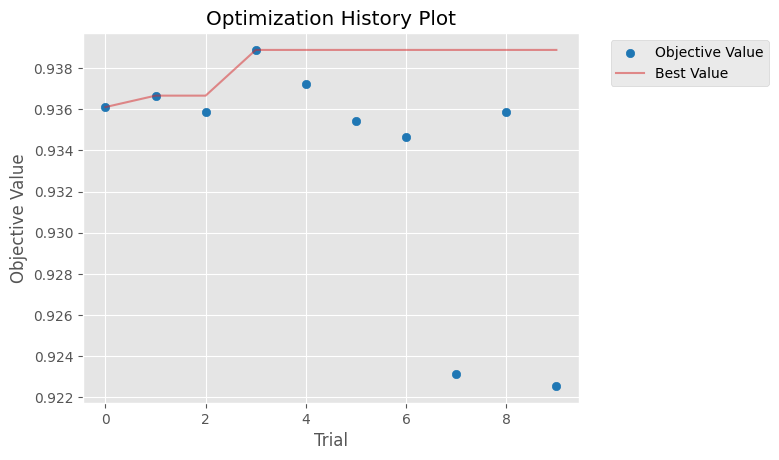

In [91]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history
!{sys.executable} -m pip install plotly matplotlib nbformat
import plotly
import matplotlib
plot_optimization_history(study)

/var/folders/2y/xmm37y9n1dz12sp0fk8rgwjm0000gn/T/ipykernel_27328/3836449081.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

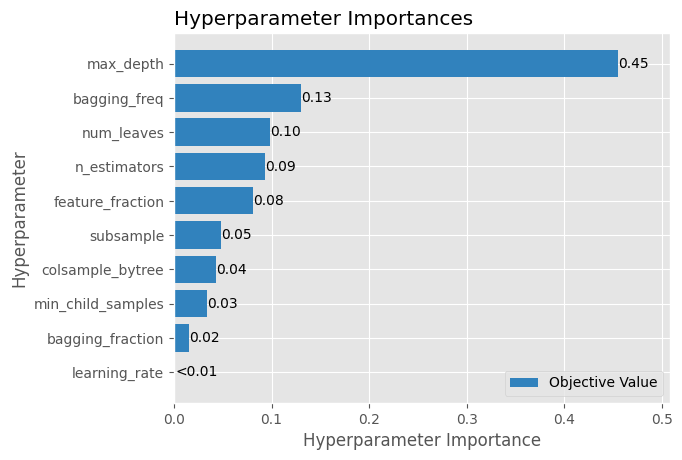

In [92]:
plot_param_importances(study)

In [93]:
study.best_params

{'n_estimators': 688,
 'learning_rate': 0.03714795707443604,
 'num_leaves': 74,
 'max_depth': 20,
 'subsample': 0.8743537834686167,
 'min_child_samples': 20,
 'colsample_bytree': 0.5298072938609741,
 'feature_fraction': 0.8224520214975917,
 'bagging_fraction': 0.7448458416860463,
 'bagging_freq': 3}

In [94]:
study.best_trial.value

0.9388888888888889

In [95]:
model = lgb.LGBMClassifier(**study.best_params)

In [96]:
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8224520214975917, colsample_bytree=0.5298072938609741 will be ignored. Current value: feature_fraction=0.8224520214975917
[LightGBM] [Warning] bagging_fraction is set=0.7448458416860463, subsample=0.8743537834686167 will be ignored. Current value: bagging_fraction=0.7448458416860463
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8224520214975917, colsample_bytree=0.5298072938609741 will be ignored. Current value: feature_fraction=0.8224520214975917
[LightGBM] [Warning] bagging_fraction is set=0.7448458416860463, subsample=0.8743537834686167 will be ignored. Current value: bagging_fraction=0.7448458416860463
[LightGBM] [Info] Number of positive: 7990

In [97]:
ytest['ypred'] = y_pred
idx = ytest[ytest['loan_status']!=ytest['ypred']].index
loan.iloc[idx]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
12929,25.0,female,High School,88778.0,0,MORTGAGE,12000.0,HOMEIMPROVEMENT,11.11,0.14,4.0,590,No,1
10852,21.0,male,Bachelor,53822.0,0,RENT,10000.0,PERSONAL,14.74,0.19,4.0,642,No,0
11275,25.0,male,Associate,81212.0,2,MORTGAGE,12000.0,DEBTCONSOLIDATION,9.63,0.15,4.0,636,No,1
10520,26.0,female,Bachelor,64317.0,5,MORTGAGE,4000.0,MEDICAL,11.89,0.06,4.0,658,No,1
17247,23.0,female,Bachelor,92495.0,0,MORTGAGE,9000.0,DEBTCONSOLIDATION,11.01,0.10,3.0,634,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,23.0,male,Master,40489.0,0,RENT,8950.0,EDUCATION,13.22,0.22,3.0,662,No,1
17840,35.0,female,Associate,778515.0,14,MORTGAGE,10000.0,PERSONAL,17.19,0.01,8.0,705,No,1
30899,45.0,female,High School,78188.0,24,MORTGAGE,4800.0,PERSONAL,8.90,0.06,17.0,690,No,1
44178,25.0,female,High School,103597.0,2,MORTGAGE,5000.0,DEBTCONSOLIDATION,11.14,0.05,3.0,611,No,1


In [98]:
ytest[ytest['loan_status']!=ytest['ypred']]

,loan_status,ypred
12929,1,0
10852,0,1
11275,1,0
10520,1,0
17247,1,0
...,...,...
5231,1,0
17840,1,0
30899,1,0
44178,1,0


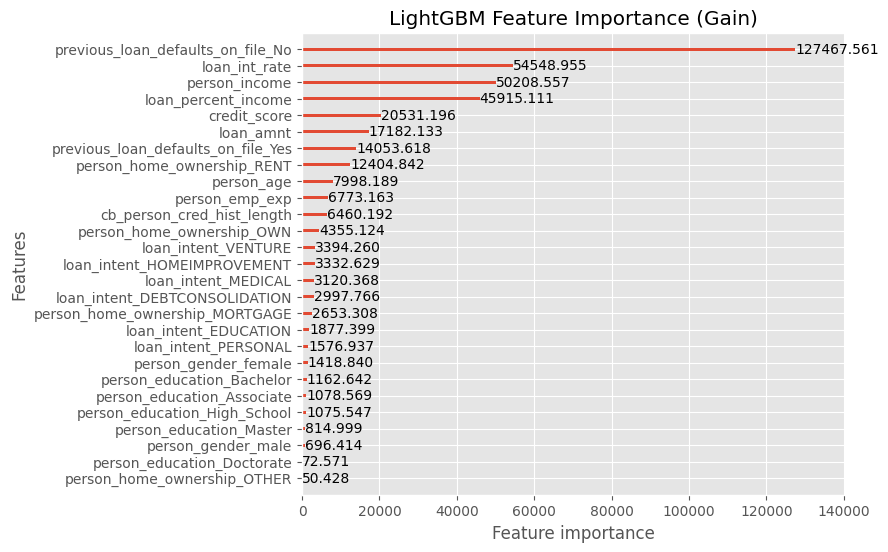

In [104]:
import matplotlib.pyplot as plt
lgb_importance = lgb.plot_importance(model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

In [106]:
lgb_importance.figure.savefig('images/feature_importance.png', bbox_inches='tight')

# Save the best model and transformer

In [68]:
import pickle

In [69]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [70]:
with open('transformer.pkl', 'wb') as f:
    pickle.dump(transformer, f)